# <font color=#20B2AA face="微軟雅黑">**Project1: Prediction of lung disease**
    根據人體中存在的化合物（膽紅素、白蛋白、蛋白質、鹼性磷酸酶）和 SGOT、SGPT 等測試，結果提到了人是否是患者，即是否需要診斷。
- Author: 羅奕丞
- Dataset: Indian Liver Patient Records

> Sourcing: https://www.kaggle.com/datasets/uciml/indian-liver-patient-records


~~不用讀醫學系也能看診囉:D~~

----------------

### Module載入
    一般來說，我建議統一放在一個cell裡面

In [51]:
import pandas as pd
%cd C:\Users\lt2726\Desktop\Python\5200 & 5205\TW Tutor lessions\In class project & HW project

C:\Users\lt2726\Desktop\Python\5200 & 5205\TW Tutor lessions\In class project & HW project


### 讀檔

In [53]:
df = pd.read_csv('indian_liver_patient.csv')
df.head()


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [40]:
type(df.Age)

pandas.core.series.Series

In [54]:
df.Age.shape
#pandas.Series.shape why we can't use it

(583,)

<AxesSubplot:xlabel='Total_Bilirubin', ylabel='Direct_Bilirubin'>

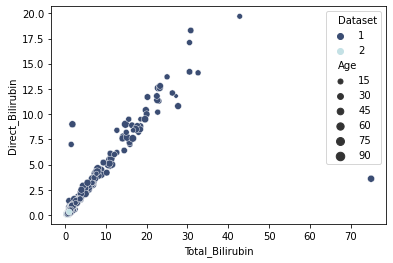

In [55]:
import seaborn as sns
# ANSWER HERE to visualize coefficent of relationship between "total_billirubin" and "direct_billirubin". or using df.corr() to show the number
#it shows here these two are positive relationship. so both of them has similar impacts on y. 
sns.scatterplot(x="Total_Bilirubin", y="Direct_Bilirubin",
                hue="Dataset",
                palette="ch:r=-.2,d=.3_r",
                # hue_order='Dataset',
                # sizes=(1, 8), linewidth=0,
                data=df, size= "Age")

In [4]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [56]:
df['Dataset'].value_counts()
# 416 liver patient
# 167 non liver patient
# liver patient and non liver patient are inbalanced. when selecting train/test samples, the ratio of train/test won't be fixed to be 416/167.


1    416
2    167
Name: Dataset, dtype: int64

## <font color=#20B2AA face="微軟雅黑">Q1: 在Build Model 之前，請先想一想，哪些特徵(Feature)對於目標變數Y可能重要性較高？
    可藉由畫圖、表格等任何呈現方法回答
    Hint: 相關性、分布

In [ ]:
# ANSWER HERE

In [57]:
#my answer is to find out the correlation cofficient between x1 and x2. (-1, 1）close to zero means no relationship. close to -1 or 1 means yes relationship. 
df.corr() # this provides same information as the graphs below. from this table, we can tell the relationship between various X and y. 

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,-0.137351
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,-0.220208
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,-0.246046
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,-0.184866
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,-0.163416
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,-0.151934
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,0.035008
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,0.161388
Albumin_and_Globulin_Ratio,-0.216408,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,0.163131
Dataset,-0.137351,-0.220208,-0.246046,-0.184866,-0.163416,-0.151934,0.035008,0.161388,0.163131,1.000000


------------------

## <font color=#20B2AA face="微軟雅黑">Q2: 資料預處理
    請選擇任意Column作為input
    並且拆分訓練集與測試集，命名為X_train, X_test, y_train, y_test

In [58]:
pd.get_dummies(df)

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
578,60,0.5,0.1,500,20,34,5.9,1.6,0.37,2,0,1
579,40,0.6,0.1,98,35,31,6.0,3.2,1.10,1,0,1
580,52,0.8,0.2,245,48,49,6.4,3.2,1.00,1,0,1
581,31,1.3,0.5,184,29,32,6.8,3.4,1.00,1,0,1


In [69]:
#trying to do it myself
X1 = df.drop('Dataset', axis =1)
y1 = df[['Dataset']]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state= 1, stratify=y1) #y1 is the y1; random_state = 1?
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier (n_neighbors=5)
#knn.fit(X1_train, y1_train) # 930 ?? one hot encoding is already done

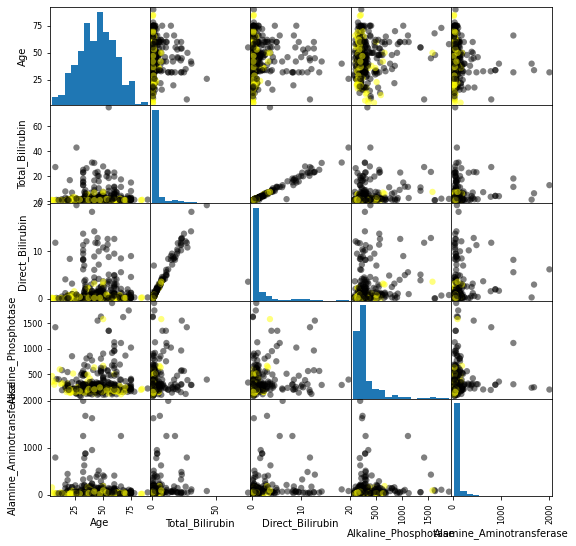

In [73]:
# ANSWER HERE
# plotting a scatter matrix
from pandas.plotting import scatter_matrix
from matplotlib import cm
from sklearn.model_selection import train_test_split

X = df[['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase']]
y = df['Dataset']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

cmap = cm.get_cmap('gnuplot')
# below are the same ?? https://pandas.pydata.org/docs/reference/api/pandas.Series.shape.html https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

# scatter = scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)
scatter = pd.plotting.scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap) #?? INCLUDING X and Y
#age to age. distribution looks like normal distribtion. age分布图
#total to total it looks like let skew distrition
#direct to direct 
#first row of five graphs, age as y, the others as x. we can see the yellow points (y data) are almost well distributed across all ages; age-direct, age-total. direct and total are almost well distributed across all ages. 
#(first row of five graphs), in addition,total & direct - dark points are also well distributed across all ages
  

In [74]:
df.corr() #age - total not related; total-direct 0.87 related

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,-0.137351
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,-0.220208
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,-0.246046
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,-0.184866
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,-0.163416
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,-0.151934
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,0.035008
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,0.161388
Albumin_and_Globulin_Ratio,-0.216408,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,0.163131
Dataset,-0.137351,-0.220208,-0.246046,-0.184866,-0.163416,-0.151934,0.035008,0.161388,0.163131,1.000000


from pandas.plotting import boxplot
boxplot
pandas.plotting.boxplot #same as use it after importing it

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [75]:
X_train

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase
213,8,0.9,0.2,401,25
532,62,0.7,0.2,162,12
361,65,0.7,0.2,182,23
443,42,0.7,0.2,152,35
399,27,1.0,0.2,205,137
...,...,...,...,...,...
277,60,2.0,0.8,190,45
9,55,0.7,0.2,290,53
359,69,0.8,0.2,146,42
192,60,2.3,0.6,272,79


----------------------------------------

## <font color=#20B2AA face="微軟雅黑">Q3: 用KNN訓練一個可以辨別病患的分類器吧!
    評估模型成效，你覺得這是一個好的Model嗎? Why?
    

In [18]:
## 建立KNN模型物件

In [76]:
# ANSWER HERE
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [82]:
er = knn.score(X_test, y_test) #score is to explain the accuracy of 
#Knn Accuracy for train data: 0.782608695652174
#Knn Accuracy for test data: 0.7191780821917808
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, stratify=y)

In [83]:
er1 = knn.score(X_train, y_train)
er
er1

0.7162471395881007

In [84]:
er

0.7123287671232876

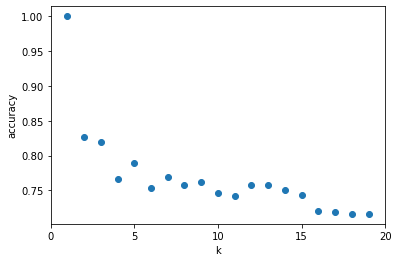

In [78]:
import matplotlib.pyplot as plt
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_train, y_train))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

TypeError: 'int' object is not iterable

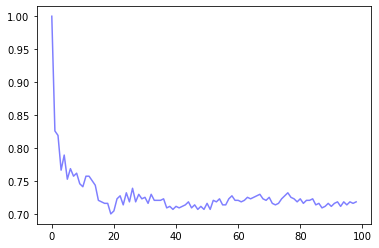

In [35]:
train_accuracy = []
test_accuracy = []

for k in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))
# print('k:', k)
# print('Knn Accuracy for train data: {}'.format(knn.score(X_train, y_train)))
# print('Knn Accuracy for test data: {}'.format(knn.score(X_test, y_test)))
plt.plot(train_accuracy, c='b', alpha=0.5, label='train')
plt.axis([max(k),min(k),max(train_accuracy),min(train_accuracy)])

plt.plot(test_accuracy, c='r', alpha=0.5, label='test')
plt.axis([max(k),min(k),max(train_accuracy),min(train_accuracy)])

plt.title('R square for each k')
plt.xlabel('k')
plt.ylabel('R square')
plt.legend()
plt.xticks([0,20,40,60,80,100]);

AttributeError: module 'matplotlib.pyplot' has no attribute 'invert_xaxis'

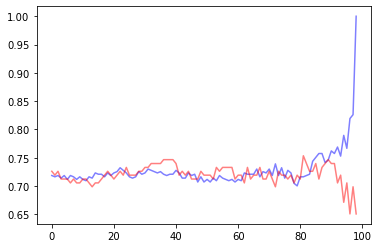

In [45]:
train_accuracy = []
test_accuracy = []

for k in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))
# print('k:', k)
# print('Knn Accuracy for train data: {}'.format(knn.score(X_train, y_train)))
# print('Knn Accuracy for test data: {}'.format(knn.score(X_test, y_test)))
plt.plot(train_accuracy[::-1], c='b', alpha=0.5, label='train')
plt.plot(test_accuracy[::-1], c='r', alpha=0.5, label='test')
#plt.invert_xaxis()
plt.title('R square for each k')
plt.xlabel('k')
plt.ylabel('R square')
plt.legend()
plt.xticks([100,80,60,40,20,0]);

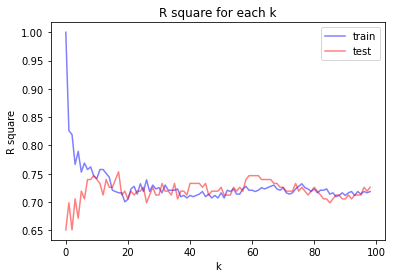

In [86]:
train_accuracy = []
test_accuracy = []

for k in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))
# print('k:', k)
# print('Knn Accuracy for train data: {}'.format(knn.score(X_train, y_train)))
# print('Knn Accuracy for test data: {}'.format(knn.score(X_test, y_test)))
plt.plot(train_accuracy, c='b', alpha=0.5, label='train')
plt.plot(test_accuracy, c='r', alpha=0.5, label='test')
plt.title('R square for each k')
plt.xlabel('k')
plt.ylabel('R square')
plt.legend()
plt.xticks([100,80,60,40,20,0]);

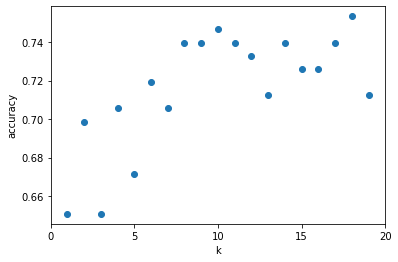

In [26]:
import matplotlib.pyplot as plt
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

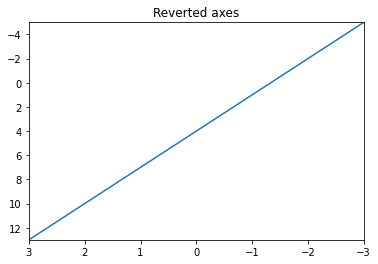

In [36]:
import numpy as np
import matplotlib.pyplot as plt

x=np.linspace(-3,3,100)
y=3*x+4

plt.plot(x, y)
plt.title("Reverted axes")
plt.axis([max(x),min(x),max(y),min(y)])

plt.show()

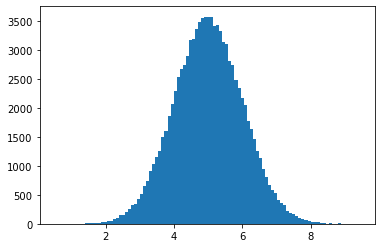

In [19]:
import numpy
import matplotlib.pyplot as plt

x = numpy.random.normal(5.0, 1.0, 100000)

plt.hist(x, 100)
plt.show()

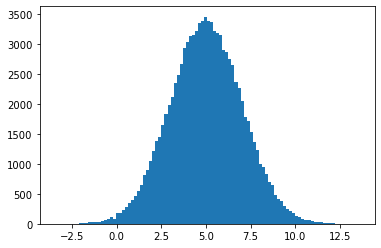

In [22]:
import numpy
import matplotlib.pyplot as plt

x = numpy.random.normal(5.0, 2.0, 100000) #?? why different??

plt.hist(x, 100)
plt.show()

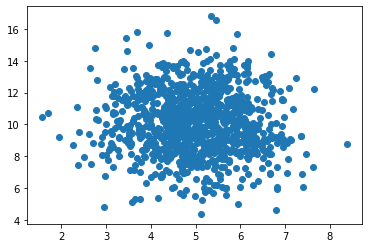

In [26]:
import numpy
import matplotlib.pyplot as plt

x = numpy.random.normal(5.0, 1.0, 1000)
y = numpy.random.normal(10.0, 2.0, 1000)

plt.scatter(x, y)
plt.show()

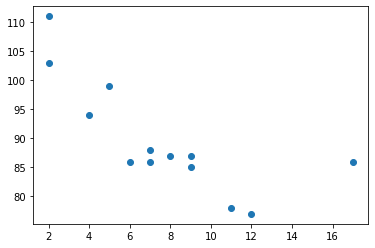

In [24]:
import matplotlib.pyplot as plt

x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

plt.scatter(x, y)
plt.show()

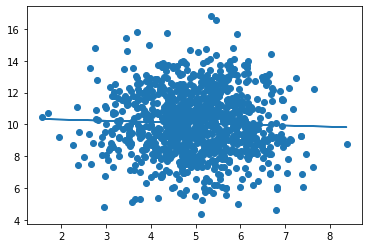

In [28]:
#draw the line of Linear Regression
#he coefficient of correlation - is called r. the relationship between x and y ??
#linear regression (only one variable: r )
##Good fit. The result -0.76 r shows that there is a relationship, not perfect, but it indicates that we could use linear regression in future predictions.
#Predict Future Values
#bad fit: The result: 0.013 indicates a very bad relationship, and tells us that this data set is not suitable for linear regression.

from scipy import stats
slope, intercept, r, p, std_err = stats.linregress(x, y) #Execute a method that returns some important key values of Linear Regression:
# r is the coefficient of correlation - The r value ranges from -1 to 1, where 0 means no relationship, and 1 (and -1) means 100% related.

def myfunc(x):
  return slope * x + intercept #Create a function that uses the slope and intercept values to return a new value. This new value represents where on the y-axis the corresponding x value will be placed:


mymodel = list(map(myfunc, x)) #Run each value of the x array through the function. This will result in a new array with new values for the y-axis:

plt.scatter(x, y) #Draw the original scatter plot:
plt.plot(x, mymodel) #Draw the line of linear regression:
plt.show() #Display the diagram:
#plt.scatter vs plt.plt ??
#use myfunc to predict 
#y= a*x +c
#r

In [33]:
#multiple linear regression 
# It is common to name the list of independent values with a upper case X, and the list of dependent values with a lower case y.
X = df[['Weight', 'Volume']]
y = df['CO2']


import pandas
from sklearn import linear_model

df = pandas.read_csv("data.csv")

X = df[['Weight', 'Volume']]
y = df['CO2']

regr = linear_model.LinearRegression()
regr.fit(X, y) # what is fit??

#predict the CO2 emission of a car where the weight is 2300kg, and the volume is 1300cm3:
predictedCO2 = regr.predict([[2300, 1300]])

print(predictedCO2) #print prediction
print(regr.coef_) #print coefficent of weight and coefficent of volume (coefficient values of the regression object)??


# y= a*X1 +b*X2
# a, b = slope/coefficent
print(regr.score(X,y)) #print coefficent of determination: R2 (R square)
#Unlike most other scores,  score may be negative (it need not actually be the square of a quantity R).

KeyError: "None of [Index(['Weight', 'Volume'], dtype='object')] are in the [columns]"

The standardization method uses this formula:

z = (x - u) / s

Where z is the new value, x is the original value, u is the mean and s is the standard deviation.

the Python sklearn module has a method called StandardScaler() which returns a Scaler object with methods for transforming data sets

In [ ]:
#Scale all values in the Weight and Volume columns
import pandas
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

df = pandas.read_csv("data.csv")

X = df[['Weight', 'Volume']]

scaledX = scale.fit_transform(X)

print(scaledX)

Train/Test is a method to measure the accuracy of your model.
80% for training, and 20% for testing.

R-squared
It measures the relationship between the x axis and the y axis, and the value ranges from 0 to 1, where 0 means no relationship, and 1 means totally related.

The sklearn module has a method called r2_score() that will help us find this relationship.

In [ ]:
#https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/
#We can demonstrate the usage of this class by converting two variables to a range 0-to-1, the default range for normalization. 
# The first variable has values between about 4 and 100, the second has values between about 0.1 and 0.001. ??
#??

#Next, the scaler is defined, fit on the whole dataset and then used to create a transformed version of the dataset with each column normalized independently. 
# We can see that the largest raw value for each column now has the value 1.0 and the smallest value for each column now has the value 0.0.
#?? what it means

In [46]:
# example of a normalization
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
# define data
data = asarray([[100, 0.001],
				[8, 0.05],
				[50, 0.005],
				[88, 0.07],
				[4, 0.1]])
print(data)
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(data)
print(scaled)

[[1.0e+02 1.0e-03]
 [8.0e+00 5.0e-02]
 [5.0e+01 5.0e-03]
 [8.8e+01 7.0e-02]
 [4.0e+00 1.0e-01]]
[[1.         0.        ]
 [0.04166667 0.49494949]
 [0.47916667 0.04040404]
 [0.875      0.6969697 ]
 [0.         1.        ]]


In [50]:
# example of a standardization
from numpy import asarray
from sklearn.preprocessing import StandardScaler
# define data
data = asarray([[100, 0.001],
				[8, 0.05],
				[50, 0.005],
				[88, 0.07],
				[4, 0.1]])
print(data)
# define standard scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(data)
print(scaled)
#We can see that the mean value in each column is assigned a value of 0.0 if present 
# and the values are centered around 0.0 with values both positive and negative.

[[1.0e+02 1.0e-03]
 [8.0e+00 5.0e-02]
 [5.0e+01 5.0e-03]
 [8.8e+01 7.0e-02]
 [4.0e+00 1.0e-01]]
[[ 1.26398112 -1.16389967]
 [-1.06174414  0.12639634]
 [ 0.         -1.05856939]
 [ 0.96062565  0.65304778]
 [-1.16286263  1.44302493]]
